In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
data_raw = pd.read_csv('pitches.csv')
# Print out size, shape, and column names
print("size: " + str(data_raw.size))
print("shape: " + str(data_raw.shape))
print("columns: " + str(data_raw.columns))

size: 114686160
shape: (2867154, 40)
columns: Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [3]:
df = data_raw
# dropping useless columns and rows with null values
df = df.drop(["nasty", "zone", "type_confidence", "pitch_type", "ab_id", "event_num"], axis = 1)
df = df.dropna()
print(df.shape)

(2847250, 34)


In [4]:
# drop balls, bunts, pitchouts
df = df[df.code.isin(['S', 'C', 'F', 'T', 'W', 'H', 'X', 'D', 'E'])]

In [5]:
# convert pitch outcomes to numbers so they can be plotted
# higher number = better outcome
outcomes = {'S': 1, 'C': 1, 'W': 1, 'T': 0.75, 'F': 0.5
, 'X': 0.25, 'D': 0, 'E': 0 }

In [6]:
df['code_num'] = df['code'].map(outcomes)

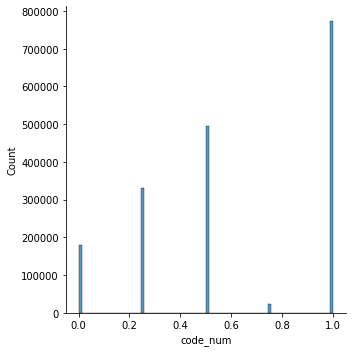

In [24]:
sns.displot(df.code_num)

In [27]:
df.break_angle.unique()

array([-25. , -40.7, -43.7, ..., 227.7, 207.4, 240.7])

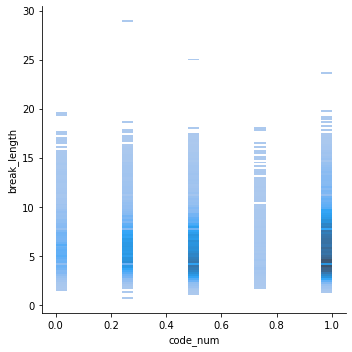

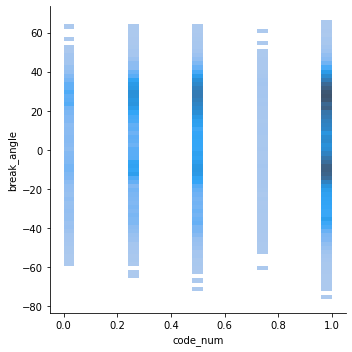

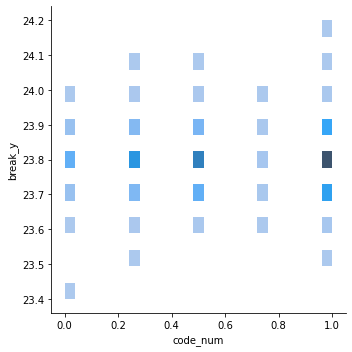

In [25]:
dfs = df[:50000]
sns.displot(data = dfs, x = 'code_num', y = 'break_length')
sns.displot(data = dfs, x = 'code_num', y = 'break_angle')
sns.displot(data = dfs, x = 'code_num', y = 'break_y')

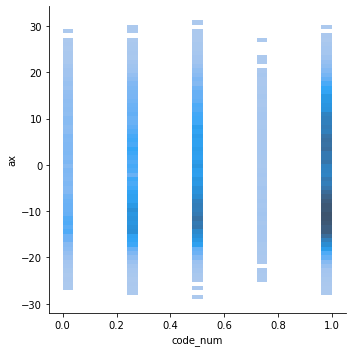

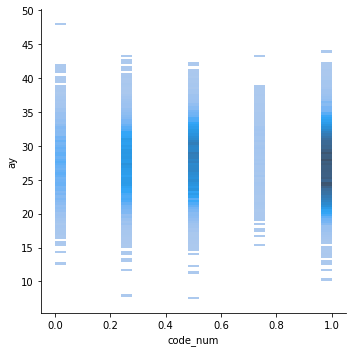

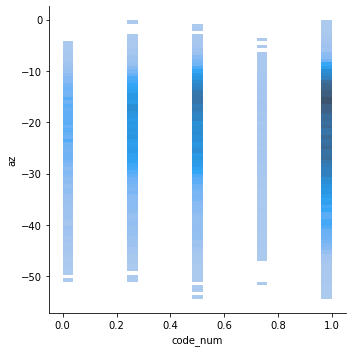

In [27]:
sns.displot(data = dfs, x = 'code_num', y = 'ax')
sns.displot(data = dfs, x = 'code_num', y = 'ay')
sns.displot(data = dfs, x = 'code_num', y = 'az')

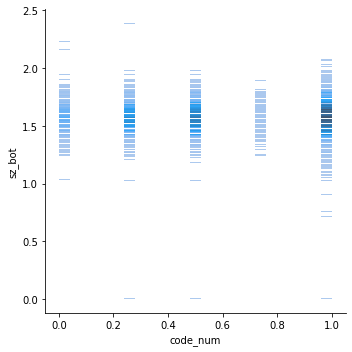

In [28]:
sns.displot(data = dfs, x = 'code_num', y = 'sz_bot')